In [86]:
# Import Libraries

import pandas as pd
import seaborn as sns
import numpy as np
import re

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

# Read in the data

df = pd.read_csv(r'/users/marwaqari/documents/movies.csv')

In [87]:
# Look at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [88]:
# Check for missing data

for col in df.columns:
    missing_values = df[col].isnull().sum()
    print(f'{col} - {missing_values}')

name - 0
rating - 77
genre - 0
year - 0
released - 2
score - 3
votes - 3
director - 0
writer - 3
star - 1
country - 3
budget - 2171
gross - 189
company - 17
runtime - 4


In [89]:
# Find rows with missing data

nan_df = df.isna()
print(nan_df)

       name  rating  genre   year  released  score  votes  director  writer  \
0     False   False  False  False     False  False  False     False   False   
1     False   False  False  False     False  False  False     False   False   
2     False   False  False  False     False  False  False     False   False   
3     False   False  False  False     False  False  False     False   False   
4     False   False  False  False     False  False  False     False   False   
...     ...     ...    ...    ...       ...    ...    ...       ...     ...   
7663  False    True  False  False     False  False  False     False   False   
7664  False    True  False  False     False  False  False     False   False   
7665  False    True  False  False     False  False  False     False   False   
7666  False    True  False  False     False   True   True     False   False   
7667  False    True  False  False     False  False  False     False   False   

       star  country  budget  gross  company  runti

In [90]:
# Check the min/max values of budget

df_min = df['budget'].min()
df_max = df['budget'].max()
print(f'{df_min} - {df_max}')



3000.0 - 356000000.0


In [91]:
# Delete NaN 

df = df.dropna()

In [92]:
# Data types for the columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [93]:
# Update data types of budget and gross columns to integer

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

In [95]:
# Create correct Year column by extracting the year from released column

df['yearcorrect'] = df['released'].astype(str).str.split(',').str[1].str.split('(').str[0]

In [105]:
# Sort by highest gross revenue

df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [100]:
# Show all data

pd.set_option('display.max_rows', None)

In [102]:
# Drop any duplicates

df.drop_duplicates(subset=['name'], inplace=True)

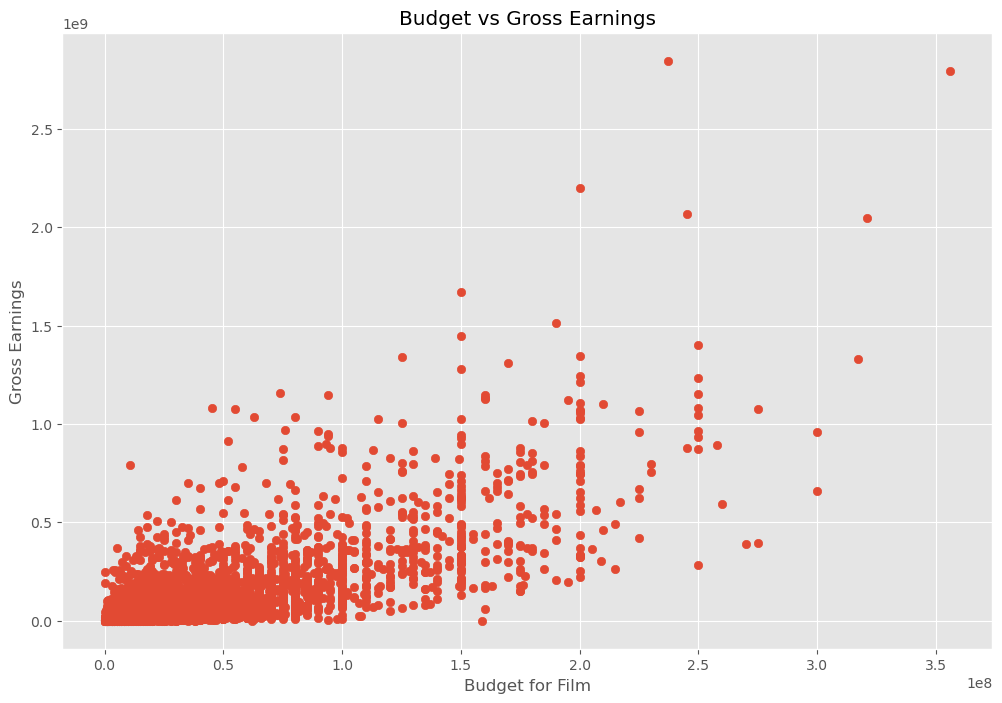

In [106]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Budget for Film')

plt.ylabel('Gross Earnings')

plt.show()

In [108]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


<Axes: xlabel='budget', ylabel='gross'>

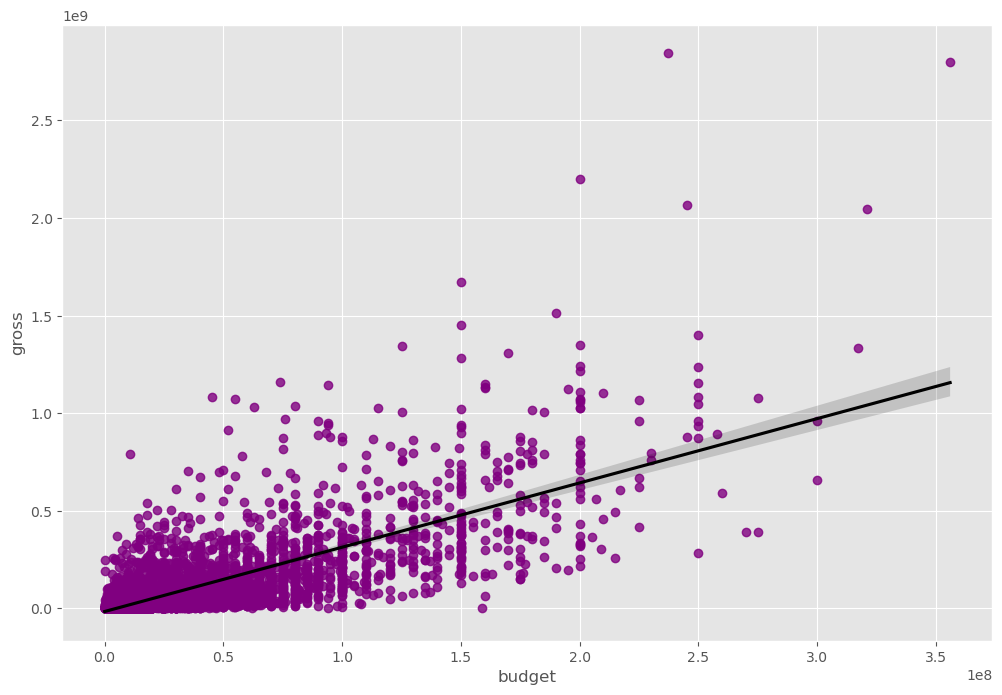

In [114]:
# Plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'purple'}, line_kws={'color':'black'})

In [115]:
# Let's look at correllation

df.corr() #pearson is default, spearman and kendall

/var/folders/4v/1p3qc9h50bdfp5t29kzf411m0000gp/T/ipykernel_37206/3226668194.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,score,votes,budget,gross,runtime
score,1.000000,0.473250,0.071325,0.222235,0.413459
votes,0.473250,1.000000,0.438567,0.618162,0.348798
budget,0.071325,0.438567,1.000000,0.737723,0.317912
gross,0.222235,0.618162,0.737723,1.000000,0.276189
runtime,0.413459,0.348798,0.317912,0.276189,1.000000


/var/folders/4v/1p3qc9h50bdfp5t29kzf411m0000gp/T/ipykernel_37206/95807147.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


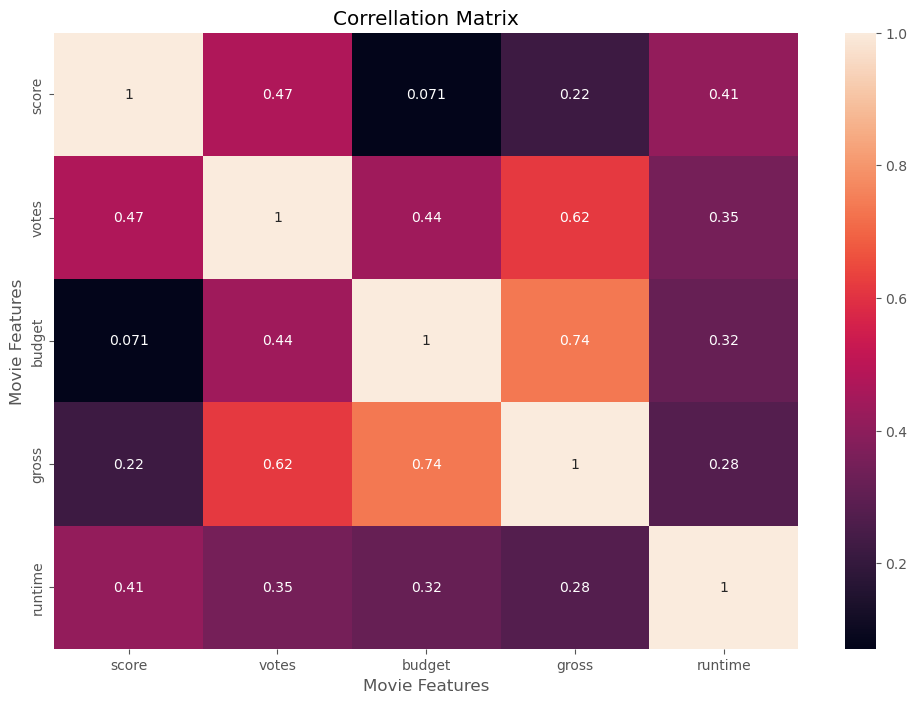

In [117]:
# Visualize the correlation

correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correllation Matrix')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()
